In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
tweets = pd.read_csv('resources/chatgpt.csv')

In [3]:
tweets.head()

,entities,referenced_tweets,text,created_at,edit_history_tweet_ids,author_id,id,withheld
0,"{'annotations': [{'start': 235, 'end': 237, 'p...","[{'type': 'replied_to', 'id': '163579010076741...",@cryptogems555 Invest in a currency that is de...,2023-03-14T23:59:11.000Z,['1635792723268497408'],1566208289058295813,1635792723268497408,NaN
1,"{'annotations': [{'start': 33, 'end': 39, 'pro...",NaN,While having all the hope around chatGPT lets ...,2023-03-14T23:58:47.000Z,['1635792623972564992'],1617818893602398208,1635792623972564992,NaN
2,"{'annotations': [{'start': 230, 'end': 232, 'p...","[{'type': 'replied_to', 'id': '163557271457965...",@IGDEFI1 Join the movement towards a more sust...,2023-03-14T23:58:46.000Z,['1635792616594763778'],1566208289058295813,1635792616594763778,NaN
3,"{'annotations': [{'start': 56, 'end': 62, 'pro...",NaN,"There's a snowstorm out so naturally, I decide...",2023-03-14T23:58:42.000Z,['1635792600916475904'],43531614,1635792600916475904,NaN
4,"{'hashtags': [{'start': 211, 'end': 216, 'tag'...","[{'type': 'replied_to', 'id': '163562746728430...",@unclebobcrypto @Stablzone Invest in a currenc...,2023-03-14T23:58:04.000Z,['1635792443537850368'],1566208289058295813,1635792443537850368,NaN


In [4]:
tweets_filtered = tweets.copy() 
tweets_filtered.shape

(151418, 8)

In [5]:
import re
import nltk

nltk.download('words')
words = set(nltk.corpus.words.words())
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words("english")
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from collections import defaultdict
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<p> Definisco un metodo per pulire i tweet da eventuali hashtag, menzioni, link e stop word

In [6]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #rimozione menzioni
    tweet = re.sub("#[A-Za-z0-9]+", "",tweet) # rimozione hashtag
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) # rimozione link
    tweet = " ".join(tweet.split())
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) if w.lower() in words and not w.lower() in stop_words)
     #rimozione stop words
    lemma_function = WordNetLemmatizer()
    tweet = " ".join(lemma_function.lemmatize(token, tag_map[tag[0]]) for token, tag in nltk.pos_tag(nltk.wordpunct_tokenize(tweet)))
    tweet = str.lower(tweet)
    return tweet

In [7]:
tweets_filtered["clean_text"] = tweets_filtered["text"].map(cleaner)
tweets_filtered.head()

,entities,referenced_tweets,text,created_at,edit_history_tweet_ids,author_id,id,withheld,clean_text
0,"{'annotations': [{'start': 235, 'end': 237, 'p...","[{'type': 'replied_to', 'id': '163579010076741...",@cryptogems555 Invest in a currency that is de...,2023-03-14T23:59:11.000Z,['1635792723268497408'],1566208289058295813,1635792723268497408,NaN,invest currency design offer great flexibility...
1,"{'annotations': [{'start': 33, 'end': 39, 'pro...",NaN,While having all the hope around chatGPT lets ...,2023-03-14T23:58:47.000Z,['1635792623972564992'],1617818893602398208,1635792623972564992,NaN,hope around forget
2,"{'annotations': [{'start': 230, 'end': 232, 'p...","[{'type': 'replied_to', 'id': '163557271457965...",@IGDEFI1 Join the movement towards a more sust...,2023-03-14T23:58:46.000Z,['1635792616594763778'],1566208289058295813,1635792616594763778,NaN,join movement towards sustainable responsible ...
3,"{'annotations': [{'start': 56, 'end': 62, 'pro...",NaN,"There's a snowstorm out so naturally, I decide...",2023-03-14T23:58:42.000Z,['1635792600916475904'],43531614,1635792600916475904,NaN,snowstorm naturally decide ask
4,"{'hashtags': [{'start': 211, 'end': 216, 'tag'...","[{'type': 'replied_to', 'id': '163562746728430...",@unclebobcrypto @Stablzone Invest in a currenc...,2023-03-14T23:58:04.000Z,['1635792443537850368'],1566208289058295813,1635792443537850368,NaN,invest currency secure private confidential wa...


### Settaggio Vader

In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Utente\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Settaggio Roberta

In [9]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [10]:
# Esecuzione di Roberta
def polarity_scores_roberta(text):   
    encoded_text = tokenizer(text, return_tensors="pt")
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'negative': scores[0],
        'neutral': scores[1],
        'positive': scores[2]
    }
    return scores_dict

<p> Eseguo la sentiment analysis con entrambi i modelli </p>

In [11]:
vader_results = {}
roberta_results = {}
for i, row in tqdm(tweets_filtered.iterrows(), total=len(tweets_filtered)):
    text = row['clean_text']
    vader_results[i] = sia.polarity_scores(text)
    roberta_results[i] = polarity_scores_roberta(text)

  0%|          | 0/151418 [00:00<?, ?it/s]

In [12]:
robertas = pd.DataFrame(roberta_results).T
robertas.head()

,negative,neutral,positive
0,0.003134,0.107320,0.889546
1,0.075790,0.631965,0.292245
2,0.003342,0.298163,0.698495
3,0.106028,0.843135,0.050837
4,0.025051,0.858097,0.116853


<p> Inserisco nel dizionario con i risultati ottenuti dalla sentiment analysis con Roberta: in base all'opinione relativa ad un tweet lo aggiungo nell'array corrispondente </p>

In [13]:
scores_dictionary = {'negative': [], 'neutral': [], 'positive': []}
def get_scores_count(robertas, scores_dictionary):
    for i in range(len(robertas.values)):
        if robertas.values[i][0] > robertas.values[i][1] and robertas.values[i][0] > robertas.values[i][2]:
            scores_dictionary['negative'].append(robertas.values[i][0])
        elif robertas.values[i][1] > robertas.values[i][0] and robertas.values[i][1] > robertas.values[i][2]:
            scores_dictionary['neutral'].append(robertas.values[i][1])
        elif robertas.values[i][2] > robertas.values[i][0] and robertas.values[i][2] > robertas.values[i][1]:
            scores_dictionary['positive'].append(robertas.values[i][2])
    
get_scores_count(robertas, scores_dictionary)
print('Negative opinions count: {}'.format(len(scores_dictionary['negative']))) 
print('Neutral opinions count: {}'.format(str(len(scores_dictionary['neutral'])))) 
print('Positive opinions count: {}'.format(len(scores_dictionary['positive']))) 
print('Total opinions count: {}'.format(len(scores_dictionary['negative']) + len(scores_dictionary['neutral']) + len(scores_dictionary['positive'])))

Negative opinions count: 8835
Neutral opinions count: 108588
Positive opinions count: 33995
Total opinions count: 151418


<p> Definisco tre metodi per ottenere le opinioni positive, negative e neutre dei risultati di Vader e poi li eseguo per popolare le tre liste </p>

In [14]:
import matplotlib.pyplot as plt
import numpy as np

vaders = pd.DataFrame(vader_results).T 
vaders['compound'].head()
scores = list(vaders['compound'])

def get_pos(lst):
    return [x for x in lst if x > 0]
def get_neg(lst):
    return [x for x in lst if x < 0]
def get_neu(lst):
    return [x for x in lst if x == 0]
positive_scores = get_pos(scores)
negative_scores = get_neg(scores)
neutral_scores = get_neu(scores)
average_positive_score = np.average(positive_scores)
average_negative_score = np.average(negative_scores)
average_neutral_score = np.average(neutral_scores)
print('Positive opinions count: {}'.format(len(positive_scores)))
print('Negative opinions count: {}'.format(len(negative_scores)))
print('Neutral opinions count: {}'.format(len(neutral_scores)))
total_scores = len(positive_scores) + len(negative_scores) + len(neutral_scores)
print('Total scores = {}'.format(total_scores))

Positive opinions count: 79348
Negative opinions count: 15030
Neutral opinions count: 57040
Total scores = 151418


In [15]:
def plot_vaders_chart():
    ypoints = (np.average(scores), average_positive_score, average_negative_score, average_neutral_score)
    xpoints = np.arange(len(ypoints))
    xtext = (0, 1, 1.35, 2)
    ytext = ((ypoints[0] + 0.05), ypoints[1] - 0.05, ypoints[2] + 0.05, ypoints[3] + 0.05)
    labels = ['average score', 'average positive score', 'average negative score', 'average neutral score']
    plt.scatter(range(len(ypoints)), ypoints)
    for i in range(len(ypoints)):
        plt.annotate(labels[i], xy = [xpoints[i], ypoints[i]], xytext = (xtext[i], ytext[i]))
    
    plt.ylabel('Sentiment analysis score')
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.show()

def plot_vaders_count_chart():
    fig, ax = plt.subplots()
    labels = ['Positive tweets', 'Negative tweets', 'Neutral tweets']
    counts = (len(positive_scores), len(negative_scores), len(neutral_scores))
    colours = ['green', 'red', 'blue']
    ax.bar(labels, counts, color=colours)
    plt.show()

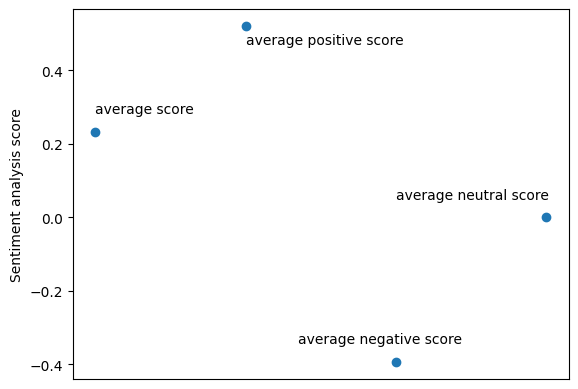

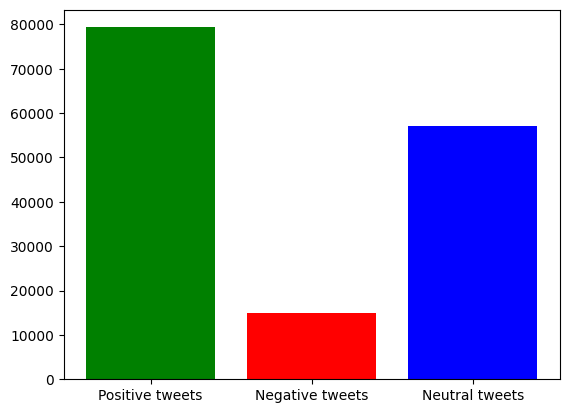

In [16]:
plot_vaders_chart()
plot_vaders_count_chart()

# Roberta model

Average negative score: 0.12641432881355286
Average neutral score: 0.583874523639679
Average positive score: 0.28971123695373535


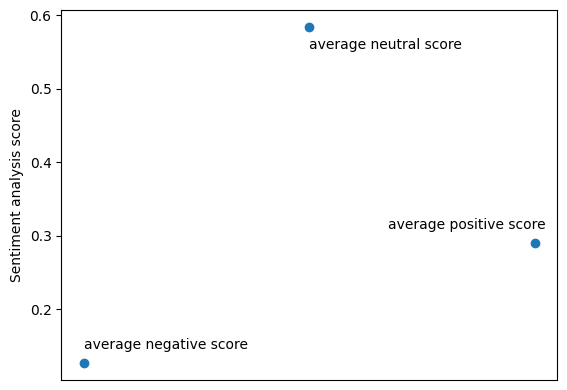

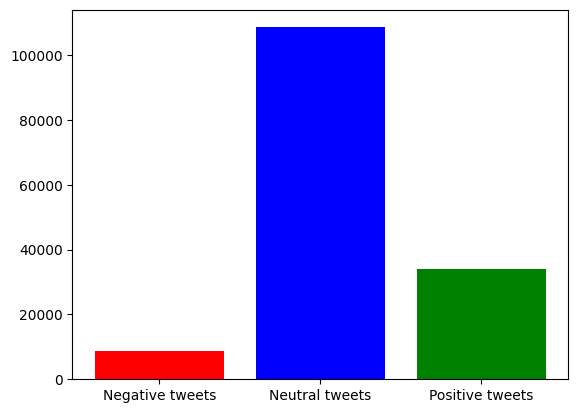

In [18]:
def plot_roberta_chart():
    ypoints = (np.average(robertas.negative), np.average(robertas.neutral), np.average(robertas.positive))
    xpoints = np.arange(len(ypoints))
    xtext = (0, 1, 1.35)
    ytext = (ypoints[0] + 0.02, ypoints[1] - 0.03, ypoints[2] + 0.02)
    labels = ['average negative score', 'average neutral score', 'average positive score']
    plt.scatter(range(len(ypoints)), ypoints)
    for i in range(len(ypoints)):
        plt.annotate(labels[i], xy = [xpoints[i], ypoints[i]], xytext = (xtext[i], ytext[i]))
    
    plt.ylabel('Sentiment analysis score')
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.show()

def plot_roberta_count_chart():
    fig, ax = plt.subplots()
    labels = ['Negative tweets', 'Neutral tweets', 'Positive tweets']
    counts = (len(scores_dictionary['negative']), len(scores_dictionary['neutral']), len(scores_dictionary['positive']))
    colours = ['red', 'blue', 'green']
    ax.bar(labels, counts, color=colours)
    plt.show()

print('Average negative score: {}'.format(np.average(robertas.negative)))
print('Average neutral score: {}'.format(np.average(robertas.neutral)))
print('Average positive score: {}'.format(np.average(robertas.positive)))
plot_roberta_chart()
plot_roberta_count_chart()